# linear regression for first range of pressure < 300kPa by scratch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('superheated_vapor_properties.csv')


In [2]:
print(data)

     Pressure Property    Liq_Sat      Vap_Sat           75          100  \
0         1.0        V     1.0000  129200.0000  160640.0000  172180.0000   
1         1.0        U    29.3340    2385.2000    2480.8000    2516.4000   
2         1.0        H    29.3350    2514.4000    2641.5000    2688.6000   
3         1.0        S     0.1060       8.9767       9.3828       9.5136   
4        10.0        V     1.0100   14670.0000   16030.0000   17190.0000   
..        ...      ...        ...          ...          ...          ...   
539   11200.0        S     3.4440       5.5476          NaN          NaN   
540   11400.0        V     1.5040      15.2840          NaN          NaN   
541   11400.0        U  1450.0000    2527.2000          NaN          NaN   
542   11400.0        H  1467.2000    2701.5000          NaN          NaN   
543   11400.0        S     3.4575       5.5357          NaN          NaN   

             125          150          175          200  ...        425  \
0    183720.

In [3]:
grouped=data.groupby(data.Property)
V_data=grouped.get_group("V")

In [95]:
print(V_data)

     Pressure Property  Liq_Sat     Vap_Sat        75       100       125  \
0         1.0        V    1.000  129200.000  160640.0  172180.0  183720.0   
4        10.0        V    1.010   14670.000   16030.0   17190.0   18350.0   
8        20.0        V    1.017    7649.800    8000.0    8584.7    9167.1   
12       30.0        V    1.022    5229.300    5322.0    5714.4    6104.6   
16       40.0        V    1.027    3993.400       NaN    4279.2    4573.3   
..        ...      ...      ...         ...       ...       ...       ...   
524   10600.0        V    1.474      16.778       NaN       NaN       NaN   
528   10800.0        V    1.481      16.385       NaN       NaN       NaN   
532   11000.0        V    1.489      16.006       NaN       NaN       NaN   
536   11200.0        V    1.496      15.639       NaN       NaN       NaN   
540   11400.0        V    1.504      15.284       NaN       NaN       NaN   

          150       175       200  ...     425         450     475  \
0    

In [4]:
range1=V_data[(V_data.Pressure<300)].iloc[:,[0,2]]

In [5]:
print(range1)

    Pressure  Liq_Sat
0      1.000    1.000
4     10.000    1.010
8     20.000    1.017
12    30.000    1.022
16    40.000    1.027
20    50.000    1.030
24    75.000    1.037
28   100.000    1.043
32   101.325    1.044
36   125.000    1.049
40   150.000    1.053
44   175.000    1.057
48   200.000    1.061
52   225.000    1.064
56   250.000    1.068
60   275.000    1.071


In [6]:
x=range1['Pressure']
x=(x-x.mean())/x.max()
y=range1['Liq_Sat']
y=(y-y.mean())/y.max()


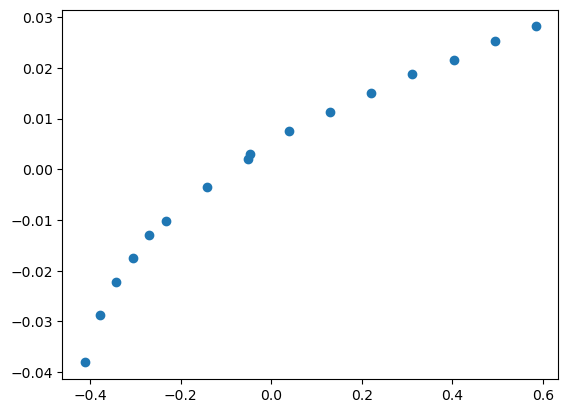

In [7]:
plt.scatter(x,y)

In [8]:
def loss(y_hat, y):
    l = (y_hat - y) ** 2 / 2
    return l.mean()

In [9]:
x.shape

(16,)

In [10]:
L=[]
N=x.shape[0]


In [11]:
def forward_pass(x,m,c):
    return m*x+c

no of iterations: 0


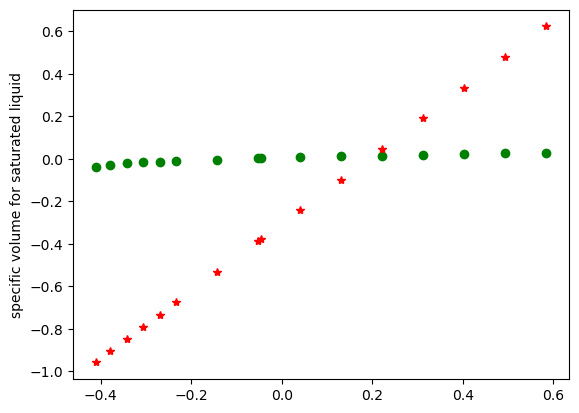

no of iterations: 5000


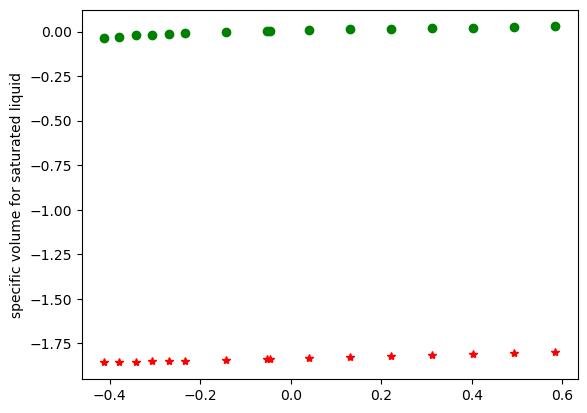

no of iterations: 10000


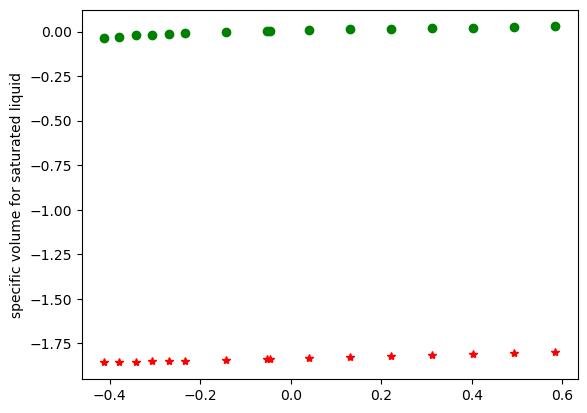

no of iterations: 15000


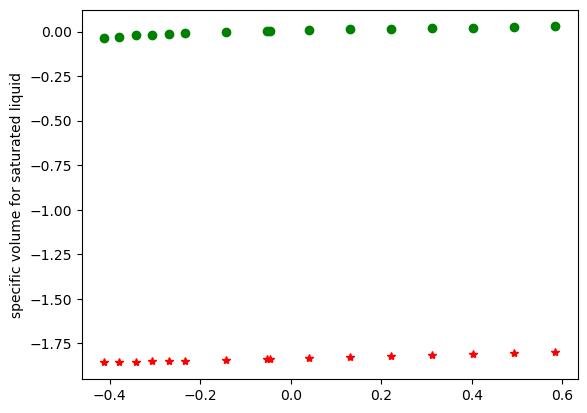

no of iterations: 20000


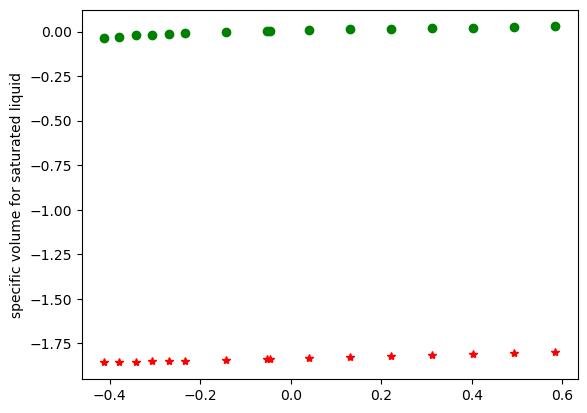

no of iterations: 25000


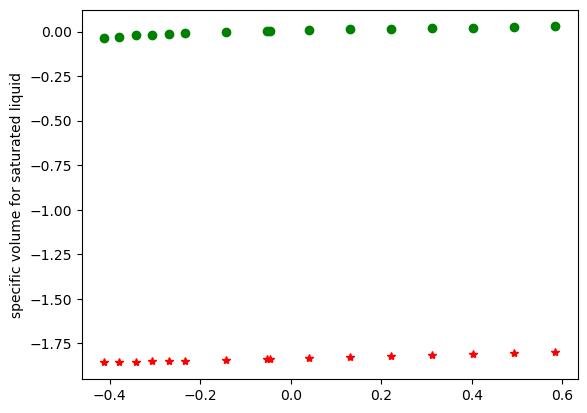

no of iterations: 30000


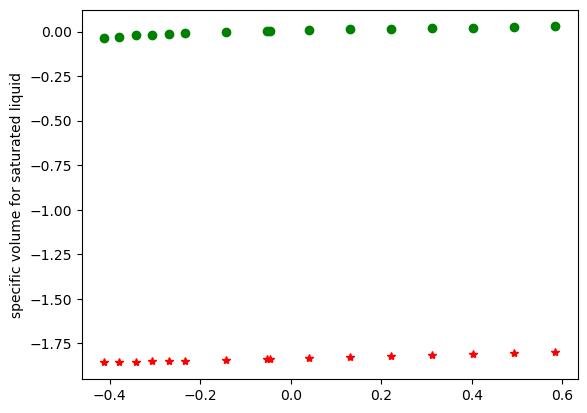

no of iterations: 35000


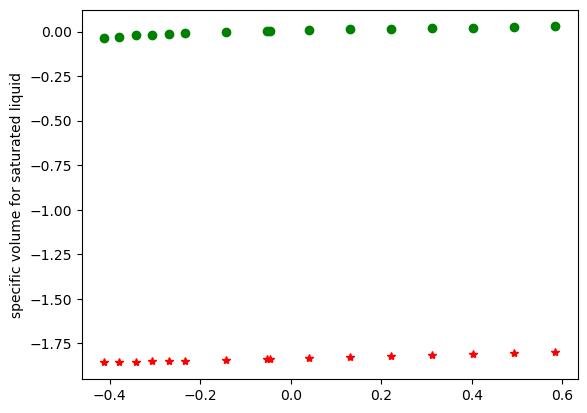

no of iterations: 40000


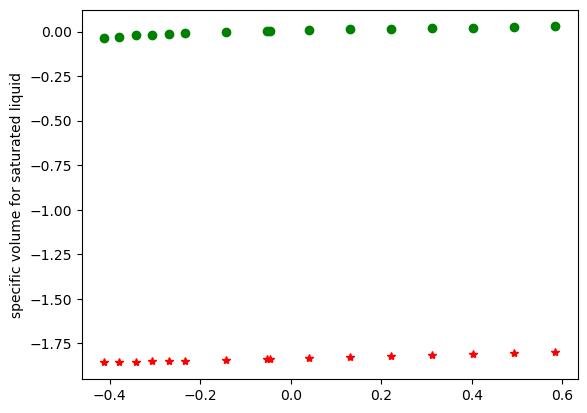

no of iterations: 45000


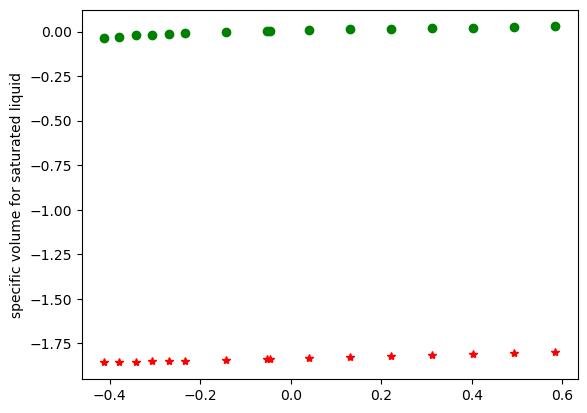

In [12]:
# Random Initialisation
m1 = np.random.randn(1)
c1 = np.random.randn(1)

# Hyperparameters
learningrate = 0.01
numiter = 50000

for i in range(numiter):
    # forward pass
    y_hat=forward_pass(x,m1,c1)
    # Loss
   
    # Gradient
    dm = (2.0/N) *  -np.sum(np.multiply(x,(y - (m1*x +c1))))
   
    dc = (2.0/N) * -np.sum(y - (m1*x + c1))
    
    m1 = m1 -learningrate * dm
    c1 = c1 - learningrate * dm
    if i%5000==0:
        L.append(loss(y_hat,y))
        print ("no of iterations:",i )
        plt.plot(x,y,'go')
        plt.plot(x,y_hat,'r*')
    #plt.plot(x,m1*x+c1,'r*')
        plt.ylabel('specific volume for saturated liquid')
        plt.show()

In [64]:
slope=m1
print(slope)
intercept=c1
print(intercept)

[-0.37292126]
[0.03769638]


# linear regression for second pressure range between 300kPa and 1500kPa by scratch

In [30]:
range2=V_data[(V_data.Pressure>=300)&(V_data.Pressure<=1500)].iloc[:,[0,2]]

In [31]:
print(range2)

     Pressure  Liq_Sat
64      300.0    1.073
68      325.0    1.076
72      350.0    1.079
76      375.0    1.081
80      400.0    1.084
84      425.0    1.086
88      450.0    1.088
92      475.0    1.091
96      500.0    1.093
100     525.0    1.095
104     550.0    1.097
108     575.0    1.099
112     600.0    1.101
116     625.0    1.103
120     650.0    1.105
124     675.0    1.106
128     700.0    1.108
132     725.0    1.110
136     750.0    1.112
140     775.0    1.113
144     800.0    1.115
148     825.0    1.117
152     850.0    1.118
156     875.0    1.120
160     900.0    1.121
164     925.0    1.123
168     950.0    1.124
172     975.0    1.126
176    1000.0    1.127
180    1050.0    1.130
184    1100.0    1.133
188    1150.0    1.136
192    1200.0    1.139
196    1250.0    1.141
200    1300.0    1.144
204    1350.0    1.146
208    1400.0    1.149
212    1450.0    1.151
216    1500.0    1.154


In [32]:
x=range2['Pressure']
x=(x-x.mean())/x.max()
y=range2['Liq_Sat']
y=(y-y.mean())/y.max()

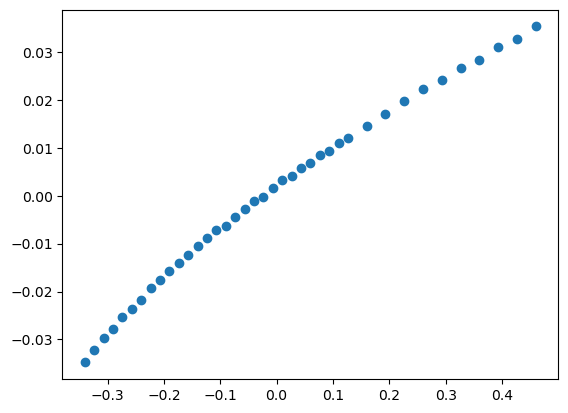

In [33]:
plt.scatter(x,y)

In [34]:
def loss(y_hat, y):
    l = (y_hat - y) ** 2 / 2
    return l.mean()

In [35]:
x.shape

(39,)

In [36]:
L=[]
N=x.shape[0]


In [37]:
def forward_pass(x,m,c):
    return m*x+c

no of iterations: 0


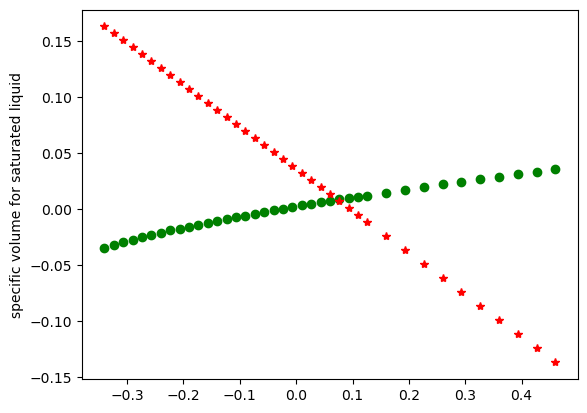

no of iterations: 5000


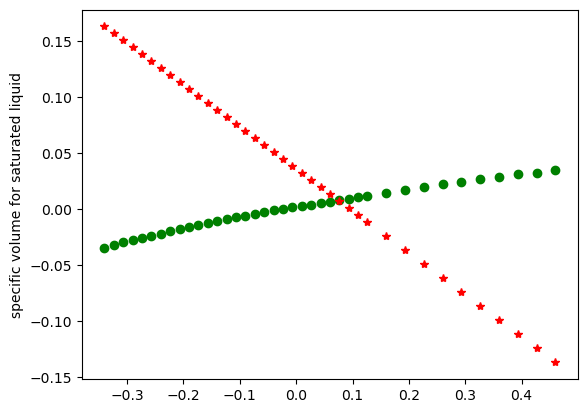

no of iterations: 10000


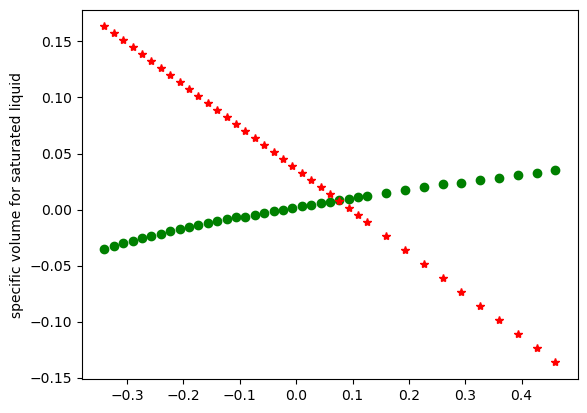

no of iterations: 15000


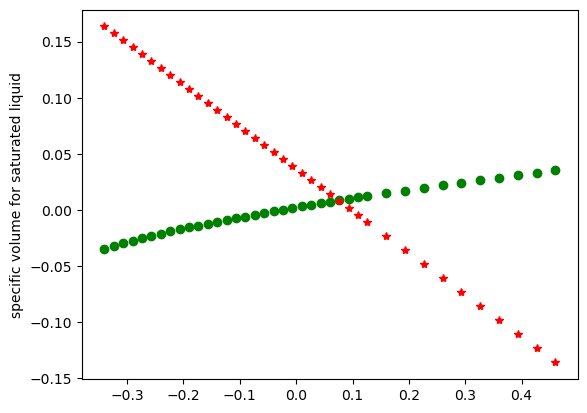

no of iterations: 20000


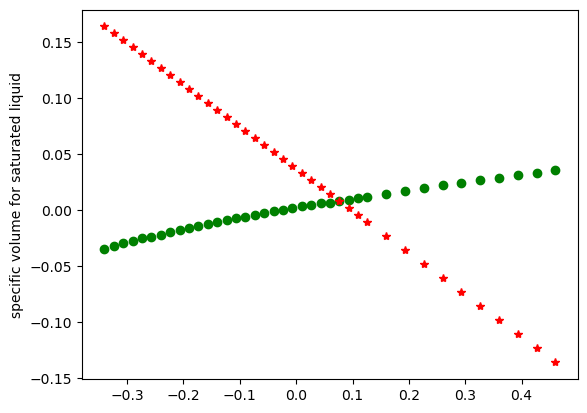

no of iterations: 25000


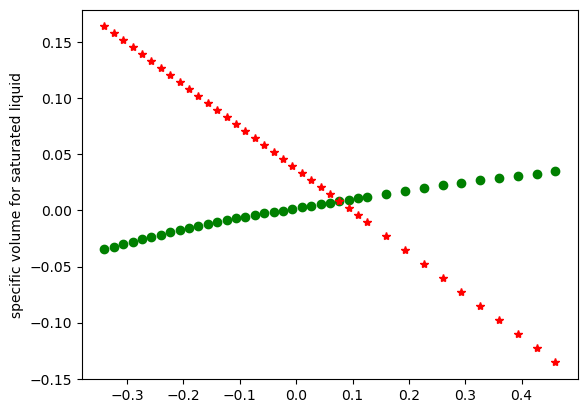

no of iterations: 30000


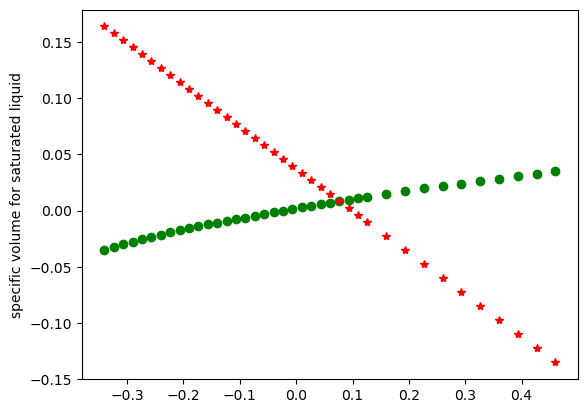

no of iterations: 35000


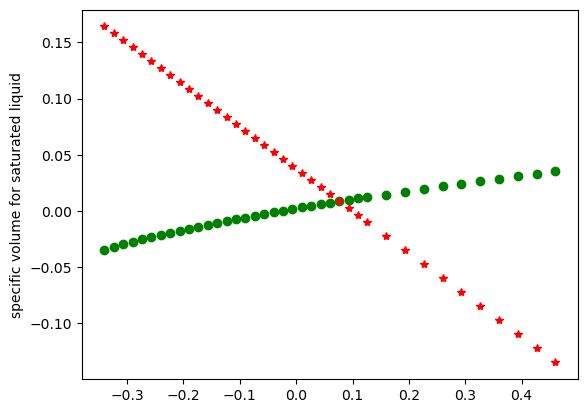

no of iterations: 40000


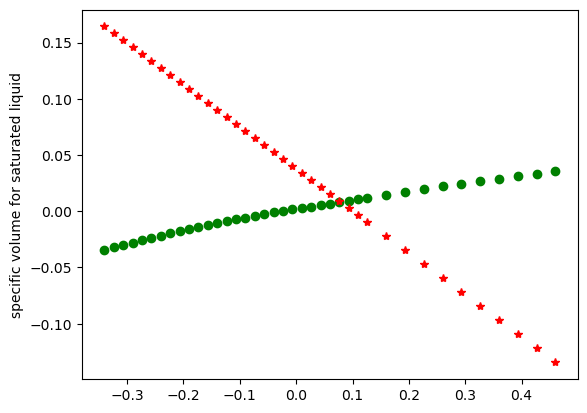

no of iterations: 45000


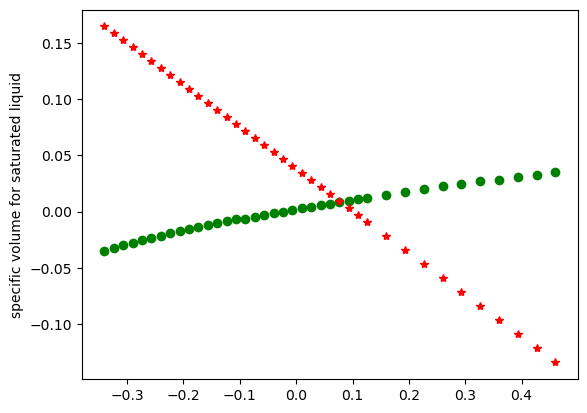

In [39]:
# Random Initialisation
m1 = np.random.randn(1)
c1 = np.random.randn(1)

# Hyperparameters
learningrate = 0.000001
numiter = 50000

for i in range(numiter):
    # forward pass
    y_hat=forward_pass(x,m1,c1)
    # Loss
   
    # Gradient
    dm = (2.0/N) *  -np.sum(np.multiply(x,(y - (m1*x +c1))))
   
    dc = (2.0/N) * -np.sum(y - (m1*x + c1))
    
    m1 = m1 -learningrate * dm
    c1 = c1 - learningrate * dm
    if i%5000==0:
        L.append(loss(y_hat,y))
        print ("no of iterations:",i )
        plt.plot(x,y,'go')
        plt.plot(x,y_hat,'r*')
    #plt.plot(x,m1*x+c1,'r*')
        plt.ylabel('specific volume for saturated liquid')
        plt.show()

In [65]:
slope=m1
print(slope)
intercept=c1
print(intercept)

[-0.37292126]
[0.03769638]


# linear regression for third pressure range >1500kPa by scratch

In [22]:
range3=V_data[(V_data.Pressure>1500)].iloc[:,[0,2]]

In [23]:
print(range3)

     Pressure  Liq_Sat
220    1550.0    1.156
224    1600.0    1.159
228    1650.0    1.161
232    1700.0    1.163
236    1750.0    1.166
..        ...      ...
524   10600.0    1.474
528   10800.0    1.481
532   11000.0    1.489
536   11200.0    1.496
540   11400.0    1.504

[81 rows x 2 columns]


In [24]:
x=range3['Pressure']
x=(x-x.mean())/x.max()
y=range3['Liq_Sat']
y=(y-y.mean())/y.max()

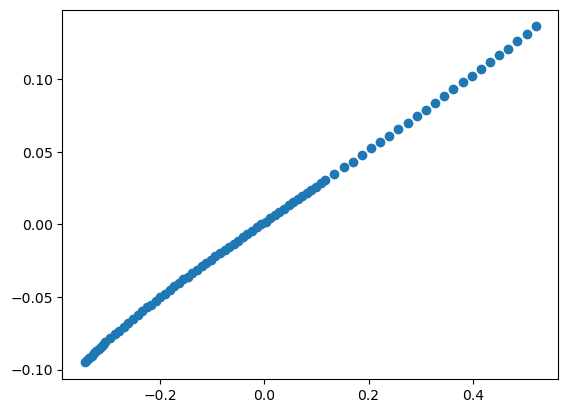

In [25]:
plt.scatter(x,y)

In [26]:
def loss(y_hat, y):
    l = (y_hat - y) ** 2 / 2
    return l.mean()

In [27]:
x.shape

(81,)

In [28]:
def forward_pass(x,m,c):
    return m*x+c

no of iterations: 0


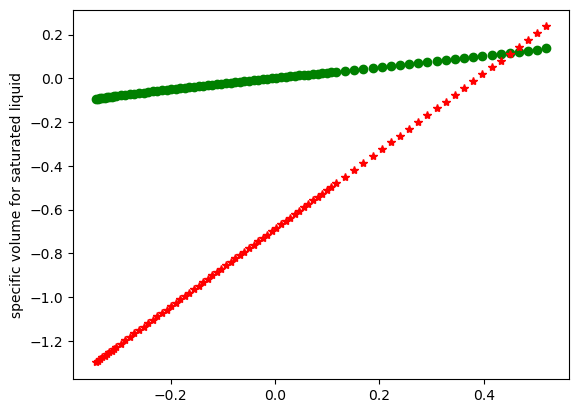

no of iterations: 5000


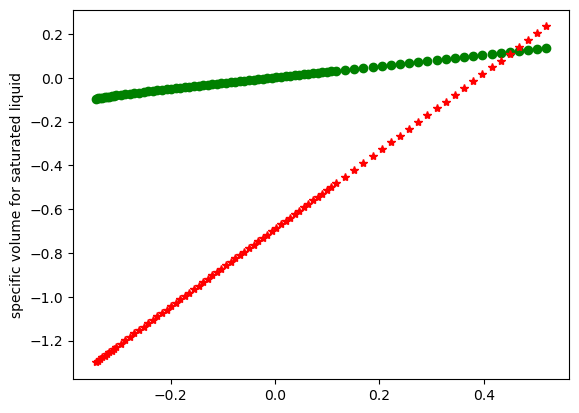

no of iterations: 10000


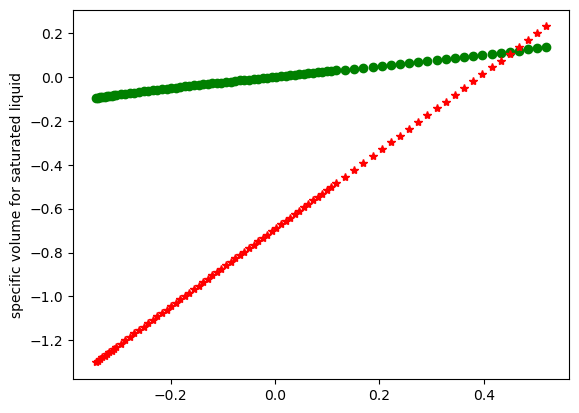

no of iterations: 15000


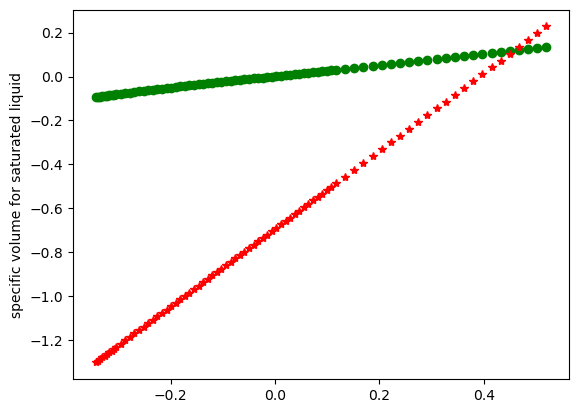

no of iterations: 20000


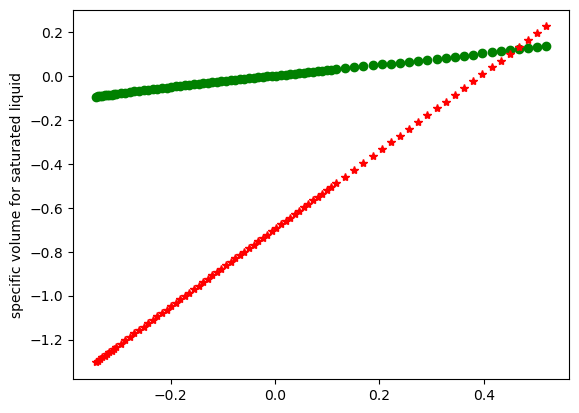

no of iterations: 25000


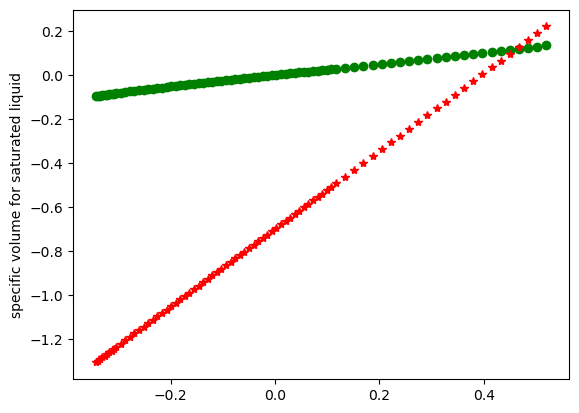

no of iterations: 30000


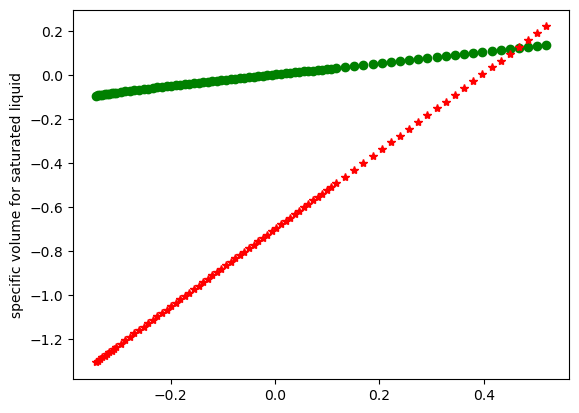

no of iterations: 35000


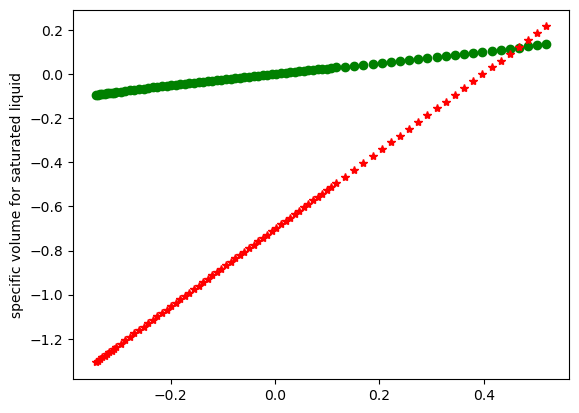

no of iterations: 40000


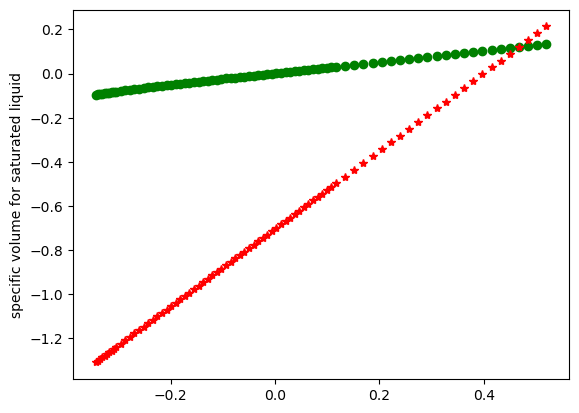

no of iterations: 45000


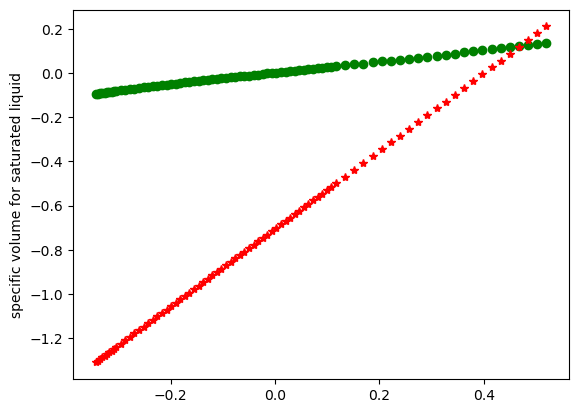

In [29]:
# Random Initialisation
m1 = np.random.randn(1)
c1 = np.random.randn(1)

# Hyperparameters
learningrate = 0.000001
numiter = 50000

for i in range(numiter):
    # forward pass
    y_hat=forward_pass(x,m1,c1)
    # Loss
   
    # Gradient
    dm = (2.0/N) *  -np.sum(np.multiply(x,(y - (m1*x +c1))))
   
    dc = (2.0/N) * -np.sum(y - (m1*x + c1))
    
    m1 = m1 -learningrate * dm
    c1 = c1 - learningrate * dm
    if i%5000==0:
        L.append(loss(y_hat,y))
        print ("no of iterations:",i )
        plt.plot(x,y,'go')
        plt.plot(x,y_hat,'r*')
    #plt.plot(x,m1*x+c1,'r*')
        plt.ylabel('specific volume for saturated liquid')
        plt.show()

In [66]:
slope=m1
print(slope)
intercept=c1
print(intercept)

[-0.37292126]
[0.03769638]


# linear regression for pressure < 300kPa using sklearn

In [40]:
from sklearn.linear_model import LinearRegression

In [47]:
x=range1['Pressure'].values.reshape(-1,1)
y=range1['Liq_Sat'].values.reshape(-1,1)

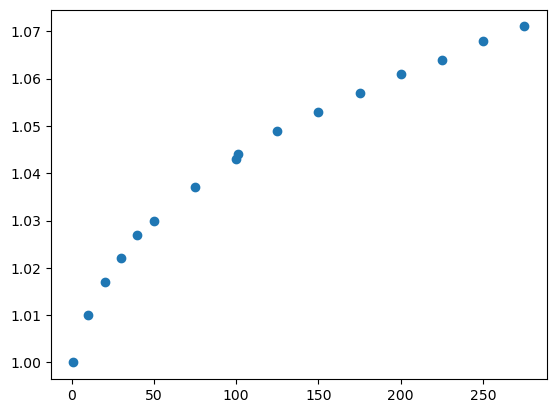

In [48]:
plt.scatter(x,y)

In [49]:
reg=LinearRegression()
reg.fit(x,y)


LinearRegression()

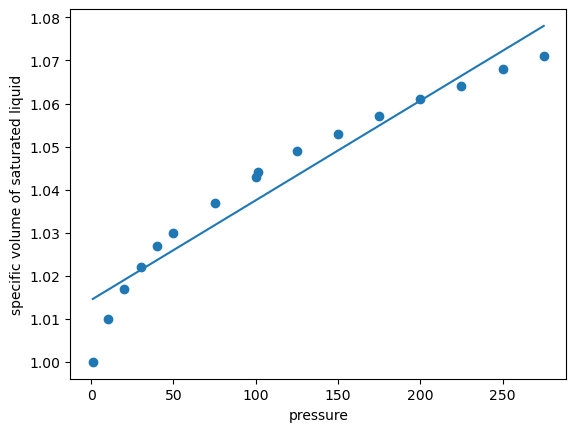

In [50]:
predictions=reg.predict(x)
plt.scatter(x,y)
plt.plot(x,predictions)
plt.xlabel("pressure")
plt.ylabel("specific volume of saturated liquid")
plt.show()

In [67]:
slope=m1
print(slope)
intercept=c1
print(intercept)

[-0.37292126]
[0.03769638]


# linear regression for pressure between 300kPa and 1500kPa using sklearn

In [51]:
from sklearn.linear_model import LinearRegression

In [53]:
x=range2['Pressure'].values.reshape(-1,1)
y=range2['Liq_Sat'].values.reshape(-1,1)

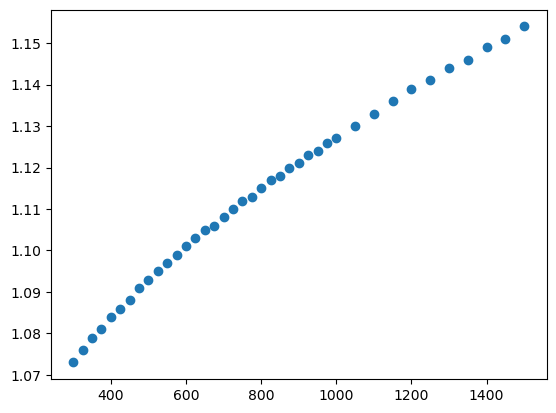

In [54]:
plt.scatter(x,y)

In [55]:
reg=LinearRegression()
reg.fit(x,y)

LinearRegression()

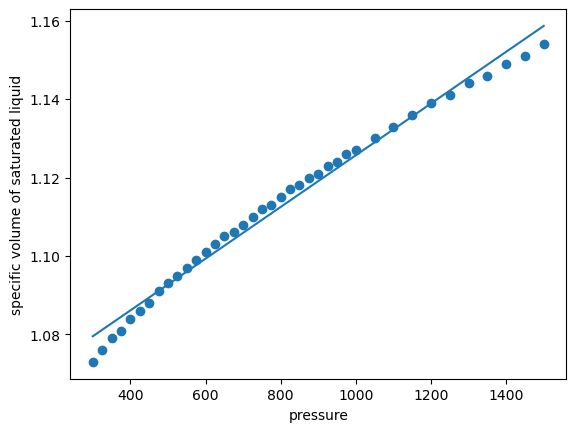

In [56]:
predictions=reg.predict(x)
plt.scatter(x,y)
plt.plot(x,predictions)
plt.xlabel("pressure")
plt.ylabel("specific volume of saturated liquid")
plt.show()

In [68]:
slope=m1
print(slope)
intercept=c1
print(intercept)

[-0.37292126]
[0.03769638]


# linear regression for pressure >1500kPa using sklearn

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
x=range3['Pressure'].values.reshape(-1,1)
y=range3['Liq_Sat'].values.reshape(-1,1)

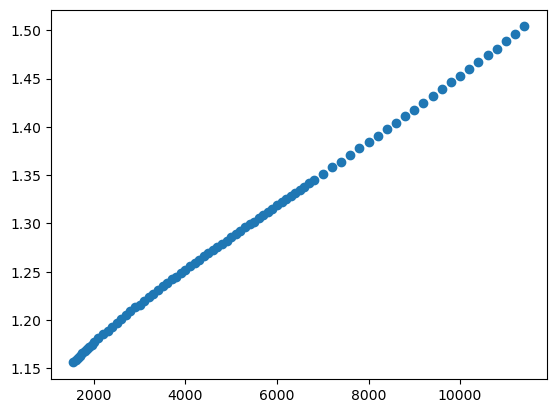

In [59]:
plt.scatter(x,y)

In [60]:
reg=LinearRegression()
reg.fit(x,y)

LinearRegression()

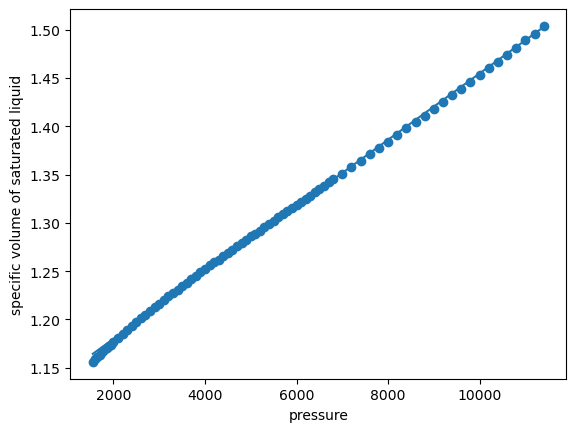

In [61]:
predictions=reg.predict(x)
plt.scatter(x,y)
plt.plot(x,predictions)
plt.xlabel("pressure")
plt.ylabel("specific volume of saturated liquid")
plt.show()

In [69]:
slope=m1
print(slope)
intercept=c1
print(intercept)

[-0.37292126]
[0.03769638]
